In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [21]:
# Start with making some data
data = np.array([[1, 2],
               [2, 1],
               [1.5, 2],
               [8, 7],
               [11, 6],
               [10, 9]])
df = pd.DataFrame(data, columns = ['Feature_1', 'Feature_2'])
df

,Feature_1,Feature_2
0,1.0,2.0
1,2.0,1.0
2,1.5,2.0
3,8.0,7.0
4,11.0,6.0
5,10.0,9.0


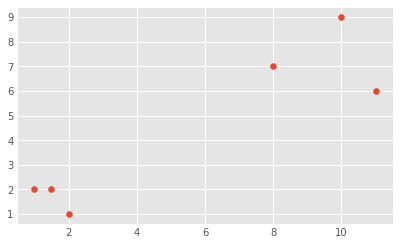

In [23]:
# Plot our data
plt.scatter(x = df['Feature_1'], y = df['Feature_2'])

We have 2 clear clusters - one on the bottom left and the other on the top right.  Lets use KMeans to see where the centroids would be 

In [24]:
# Make an instance
kmeans = KMeans(n_clusters=2)
# Fit our data
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
# grab centroids
centroids = kmeans.cluster_centers_

# grab cluster labels
labels = kmeans.labels_

In [26]:
df['labels'] = labels
df

,Feature_1,Feature_2,labels
0,1.0,2.0,0
1,2.0,1.0,0
2,1.5,2.0,0
3,8.0,7.0,1
4,11.0,6.0,1
5,10.0,9.0,1


Next I am going to plot my scatter plot again with each label being a color and the centroids being an X

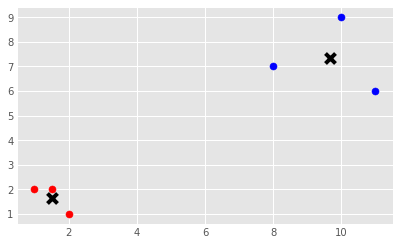

In [42]:
# seperate data by label
df_0 = df.loc[df['labels'] == 0].copy()
df_1 = df.loc[df['labels'] == 1].copy()

plt.scatter(x = df_0['Feature_1'], y = df_0['Feature_2'], c = 'red', s = 50)
plt.scatter(x = df_1['Feature_1'], y = df_1['Feature_2'], c = 'blue', s = 50)
plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, marker='x', color = 'k')